In [39]:
# MPG 예측 프로그램 설계 
import pandas as pd

df = pd.read_csv('./auto-mpg.data', sep='\s+',names=["displacement","mpg","cylinders",
                                               "horsepower","weight","acceleration", "model_year", "origin", "car_name"])
df


,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [40]:
len(df["car_name"].unique()) # 자동차 이름은 필요가 없다는 것을 판단 -> 너무 강한 고정값이 되어버린다

305

In [41]:
df.info() # horsepower가 문자열 객체(Object)다! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   mpg           398 non-null    int64  
 2   cylinders     398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [42]:
import numpy as np
# ? 값을 결측값으로 대체
for i in df.columns :
    df[i]=df[i].replace("?",np.nan)

In [43]:
df["horsepower"]=df["horsepower"].astype("float64")

In [44]:
# 결측값 확인 -> horsepower에서 결측값이 많이 발견됨
df[df["horsepower"].isnull()]

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [45]:
df[df.columns[:-1]].corr()["mpg"] 
# 하지만 horsepower은 많은 연관성이 있으므로, 해당 값들을 삭제한다 

displacement   -0.775396
mpg             1.000000
cylinders       0.950721
horsepower      0.842983
weight          0.896017
acceleration   -0.505419
model_year     -0.348746
origin         -0.562543
Name: mpg, dtype: float64

In [46]:
df.drop(df[df["horsepower"].isnull()].index, axis=0, inplace=True)

In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
df # 오케이 잘 제거됌 

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [49]:
# ols 분석 시행하여 유의미한 변수를 찾음
import statsmodels.formula.api as smf 
formula = 'mpg ~  displacement+cylinders+horsepower+weight+acceleration+model_year+origin'
result = smf.ols(formula, df).fit()
result.summary() 
# Adj.R-squared : 0.906 -> 꽤나 높은 수치를 보인다
# Log-Likelihood(우도) : -298.62 값이 낮으므로, test score의 부진이 예상됨
# AIC, BIC : 613,645 -> 값이 크므로, test score의 부진이 예상됨
# Skew : 0.301 -> 0보다 크므로, 왼쪽으로 데이터가 치우침 : 정규화 필수!
# Kurtosis : 2.975 -> 3의 근사하므로, 정규분포와 유사한 형태를 띄고 있음
# Cond. No. : 8.63e+04 -> 살짝 큰 값이므로, 모든 설명변수를 다 쓸 필요 없다

# ==> 즉, P-value가 0.05(유의수준)보다 낮고, 높은 선형성의 관계를 갖는 값
# cylinders, horsepower, weight, displacement => displacement는 설명력이 떨어져서 제외 : cylinders, horsepower 두개로 가보자! 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     537.7
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          4.51e-194
Time:                        09:01:50   Log-Likelihood:                -298.62
No. Observations:                 392   AIC:                             613.2
Df Residuals:                     384   BIC:                             645.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3167      0.734      3.154      0.002       0.873       3.761
displacement    -0.0122      0.008     -1.526      0.128      -0.028       0.004
cylinders        0.0156      0.001     17.500      0.000       0.014       0.017
horsepower      -0.0054      0.002     -2.503      0.013      -0.010      -0.001
weight           0.0002      0.000      1.535      0.126   -4.94e-05       0.000
acceleration    -0.0144      0.016     -0.924      0.356      -0.045       0.016
model_year       0.0068      0.010      0.677      0.499      -0.013       0.027
origin           0.1018      0.045      2.265      0.024       0.013       0.190
==============================================================================
Omnibus:                        5.913   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.946
Skew:                           0.301   Prob(JB):                       0.0511
Kurtosis:                       2.975   Cond. No.                     8.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# cylinders, horsepower 관련 열 추가
from sklearn.preprocessing import PolynomialFeatures

target=df["mpg"]
feature=df[["cylinders", "horsepower"]]

poly = PolynomialFeatures(degree=2, include_bias=False) # PolyFeatures 객체 생성

df2=pd.DataFrame(poly.fit_transform(feature), columns=poly.get_feature_names_out()) # DataFrame으로 변환

df = pd.concat([target,df2],axis=1) # DataFrame 병합 

In [51]:
df.corr()["mpg"]  # cylinders와 cylinders horsepower를 사용해보자 

mpg                     1.000000
cylinders               0.950823
horsepower              0.842983
cylinders^2             0.912403
cylinders horsepower    0.884759
horsepower^2            0.799052
Name: mpg, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split 
# 데이터 셋 생성 
target = df["mpg"]
feaature = df[["cylinders","cylinders horsepower"]]
x_train, x_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.3,
                                                    stratify=target)

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 정규화 
std_scaler=StandardScaler()
mm_scaler=MinMaxScaler()
rb_scaler=RobustScaler()
sl=[std_scaler, mm_scaler, rb_scaler]

sv= [[],[],[]]
sv2=[[],[],[]]

for i,v in enumerate(sl) :
    v.fit(x_train)
    sv[i]=v.transform(x_train).copy()
    v.fit(x_test)
    sv2[i]=v.transform(x_test).copy()
    
    
x_train_std=sv[0]
x_train_mm=sv[1]
x_train_rb=sv[2]
x_test_std=sv2[0]
x_test_mm=sv2[1]
x_test_rb=sv2[2]

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

dataset=[x_train_std, x_train_mm, x_train_rb, x_test_std, x_test_mm, x_test_rb]
score_list=[]
for i in range(int(len(dataset)/2)) :
    model=LinearRegression()
    model.fit(dataset[i], y_train)
    train_score=model.score(dataset[i], y_train)
    model.fit(dataset[i+3], y_test)
    test_score=model.score(dataset[i+3], y_test)
    y_pre=model.predict(dataset[i+3])
    mse=mean_squared_error(y_test, y_pre, squared=False)
    mae=mean_absolute_error(y_test, y_pre)
    score_list.append([train_score, test_score, mse, mae])


In [55]:
score_list

[[0.9002937533229697,
  0.9153370638166237,
  0.4949399498247045,
  0.36537307509001743],
 [0.9002937533229697,
  0.9153370638166237,
  0.4949399498247044,
  0.3653730750900174],
 [0.9002937533229697,
  0.9153370638166237,
  0.4949399498247044,
  0.3653730750900173]]

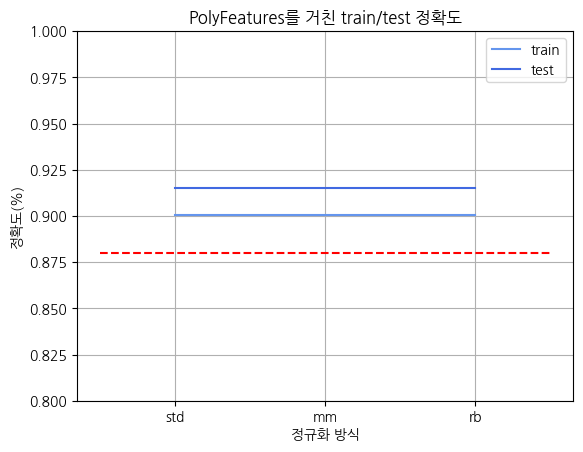

In [56]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

data=np.array(score_list).T
plt.plot(range(3), data[0], color='cornflowerblue', label='train')
plt.plot(range(3), data[1], color='royalblue', label='test')
plt.legend()
plt.hlines(y=0.88, xmin=-0.5, xmax=2.5, colors='r', linestyles='dashed', label='Horizontal Line')
plt.xticks(range(3), ['std', 'mm', 'rb'])
plt.xlabel("정규화 방식")
plt.ylabel("정확도(%)")
plt.title("PolyFeatures를 거친 train/test 정확도")
plt.ylim(0.8, 1)
plt.grid(True)
plt.savefig("PolyFeature True.png")
plt.show()

In [57]:
# 1인분은 했고, 이제 더 개선시켜보자! 


# =============현재까지의 스코어=============
# 정규화 방식 : Standard, MinMax, Robust
# 분석 모델 : Linear Regression
# train score : 90.6%
# test score : 90.1%
# mse : 0.542
# mae : 0.416